# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#!pip install scikit-learn yellowbrick


  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    -----------------------

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
bank_df = pd.read_csv("bank_transactions_data_2.csv")

# Menampilkan 5 data teratas
bank_df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:


1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [63]:
bank_df.sample(5)

TransactionID AccountID  TransactionAmount      TransactionDate  \
828       TX000829   AC00249              70.03  2023-12-18 18:34:33   
554       TX000555   AC00322              43.73  2023-04-03 16:43:29   
2199      TX002200   AC00224             177.94  2023-09-26 16:08:25   
1274      TX001275   AC00398            1159.39  2023-10-12 16:29:49   
1253      TX001254   AC00439             903.19  2023-07-06 17:52:32   

     TransactionType       Location DeviceID      IP Address MerchantID  \
828            Debit      Nashville  D000005   193.221.15.59       M073   
554            Debit          Omaha  D000631    194.88.79.54       M011   
2199           Debit      Milwaukee  D000698    27.93.195.98       M088   
1274           Debit  Oklahoma City  D000294  173.135.78.201       M091   
1253           Debit        El Paso  D000286    174.61.77.54       M028   

     Channel  CustomerAge CustomerOccupation  TransactionDuration  \
828   Branch           63            Retired                   49   
554      ATM           34             Doctor                  145   
2199  Online           19            Student                  173   
1274  Online           41             Doctor                  150   
1253  Online           22            Student                   65   

      LoginAttempts  AccountBalance PreviousTransactionDate  
828               1         7330.31     2024-11-04 08:07:55  
554               1         9929.43     2024-11-04 08:10:33  
2199              1          123.24     2024-11-04 08:11:29  
1274              1         6499.53     2024-11-04 08:06:27  
1253              1         8627.08     2024-11-04 08:06:37

In [64]:
#Meninjau jumlah baris dan kolom
jumlah_data = bank_df.shape[0]
jumlah_fitur = bank_df.shape[1]
print(f"\nDataset terdiri dari {jumlah_data} baris dan {jumlah_fitur} kolom.")



Dataset terdiri dari 2512 baris dan 16 kolom.


In [65]:
#Meninjau tipe data
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [18]:
# Menampilkan statistik deskriptif untuk semua kolom
bank_df.describe(include='all')

TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2512      2512        2512.000000                 2512   
unique          2512       495                NaN                 2512   
top         TX002496   AC00460                NaN  2023-04-03 16:07:53   
freq               1        12                NaN                    1   
mean             NaN       NaN         297.593778                  NaN   
std              NaN       NaN         291.946243                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.885000                  NaN   
50%              NaN       NaN         211.140000                  NaN   
75%              NaN       NaN         414.527500                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count             2512        2512     2512            2512       2512   
unique               2          43      681             592        100   
top              Debit  Fort Worth  D000548  200.136.146.93       M026   
freq              1944          70        9              13         45   
mean               NaN         NaN      NaN             NaN        NaN   
std                NaN         NaN      NaN             NaN        NaN   
min                NaN         NaN      NaN             NaN        NaN   
25%                NaN         NaN      NaN             NaN        NaN   
50%                NaN         NaN      NaN             NaN        NaN   
75%                NaN         NaN      NaN             NaN        NaN   
max                NaN         NaN      NaN             NaN        NaN   

       Channel  CustomerAge CustomerOccupation  TransactionDuration  \
count     2512  2512.000000               2512          2512.000000   
unique       3          NaN                  4                  NaN   
top     Branch          NaN            Student                  NaN   
freq       868          NaN                657                  NaN   
mean       NaN    44.673965                NaN           119.643312   
std        NaN    17.792198                NaN            69.963757   
min        NaN    18.000000                NaN            10.000000   
25%        NaN    27.000000                NaN            63.000000   
50%        NaN    45.000000                NaN           112.500000   
75%        NaN    59.000000                NaN           161.000000   
max        NaN    80.000000                NaN           300.000000   

        LoginAttempts  AccountBalance PreviousTransactionDate  
count     2512.000000     2512.000000                    2512  
unique            NaN             NaN                     360  
top               NaN             NaN     2024-11-04 08:09:17  
freq              NaN             NaN                      16  
mean         1.124602     5114.302966                     NaN  
std          0.602662     3900.942499                     NaN  
min          1.000000      101.250000                     NaN  
25%          1.000000     1504.370000                     NaN  
50%          1.000000     4735.510000                     NaN  
75%          1.000000     7678.820000                     NaN  
max          5.000000    14977.990000                     NaN

In [19]:
# Menampilkan jumlah nilai unik tiap kolom
bank_df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [20]:
bank_df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Tidak ditemukan data yang hilang, sehingga tidak diperlukan penanganan missing value pada tahap ini. Jika ditemukan nilai hilang di tahapan lain, penanganan akan dilakukan pada bagian Data Preprocessing.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.



In [7]:
numeric_columns = bank_df.select_dtypes(include='number').columns # Menentukan kolom numerik
num_numeric = len(numeric_columns)
print("Statistik deskriptif fitur numerik:")
display(bank_df[numeric_columns].describe())


Statistik deskriptif fitur numerik:


TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

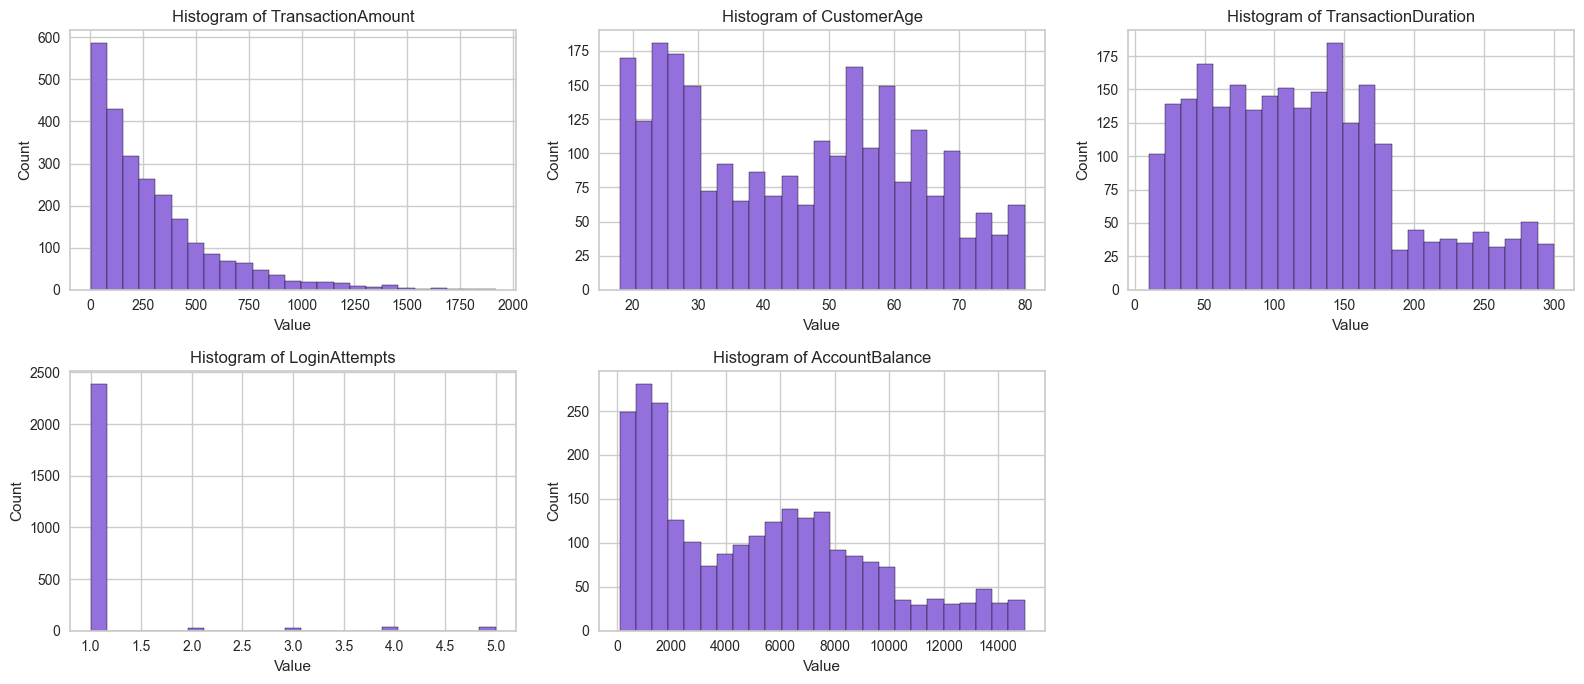

In [8]:
# Visualisasi distribusi dari setiap fitur numerik dalam bentuk histogram
# Menentukan jumlah kolom dan baris plot untuk grid plot histogram
plots_per_row = 3
rows_required = -(-num_numeric // plots_per_row)  # ceiling division agar cukup

# Membuat kanvas subplot
fig, hist_axes = plt.subplots(rows_required, plots_per_row, figsize=(16, rows_required * 3.5))
hist_axes = hist_axes.ravel()  # Diubah ke 1 dimensi agar bisa diakses per index

# Plot histogram untuk masing-masing fitur numerik
for i, column in enumerate(numeric_columns):
    bank_df[column].hist(ax=hist_axes[i], bins=25, color='mediumpurple', edgecolor='black')
    hist_axes[i].set_title(f"Histogram of {column}")
    hist_axes[i].set_xlabel("Value")
    hist_axes[i].set_ylabel("Count")

# Menghapus subplot kosong jika ada sisa slot yang tidak terpakai
for j in range(i + 1, len(hist_axes)):
    fig.delaxes(hist_axes[j])

# Merapikan tata letak keseluruhan
plt.tight_layout()
plt.show()



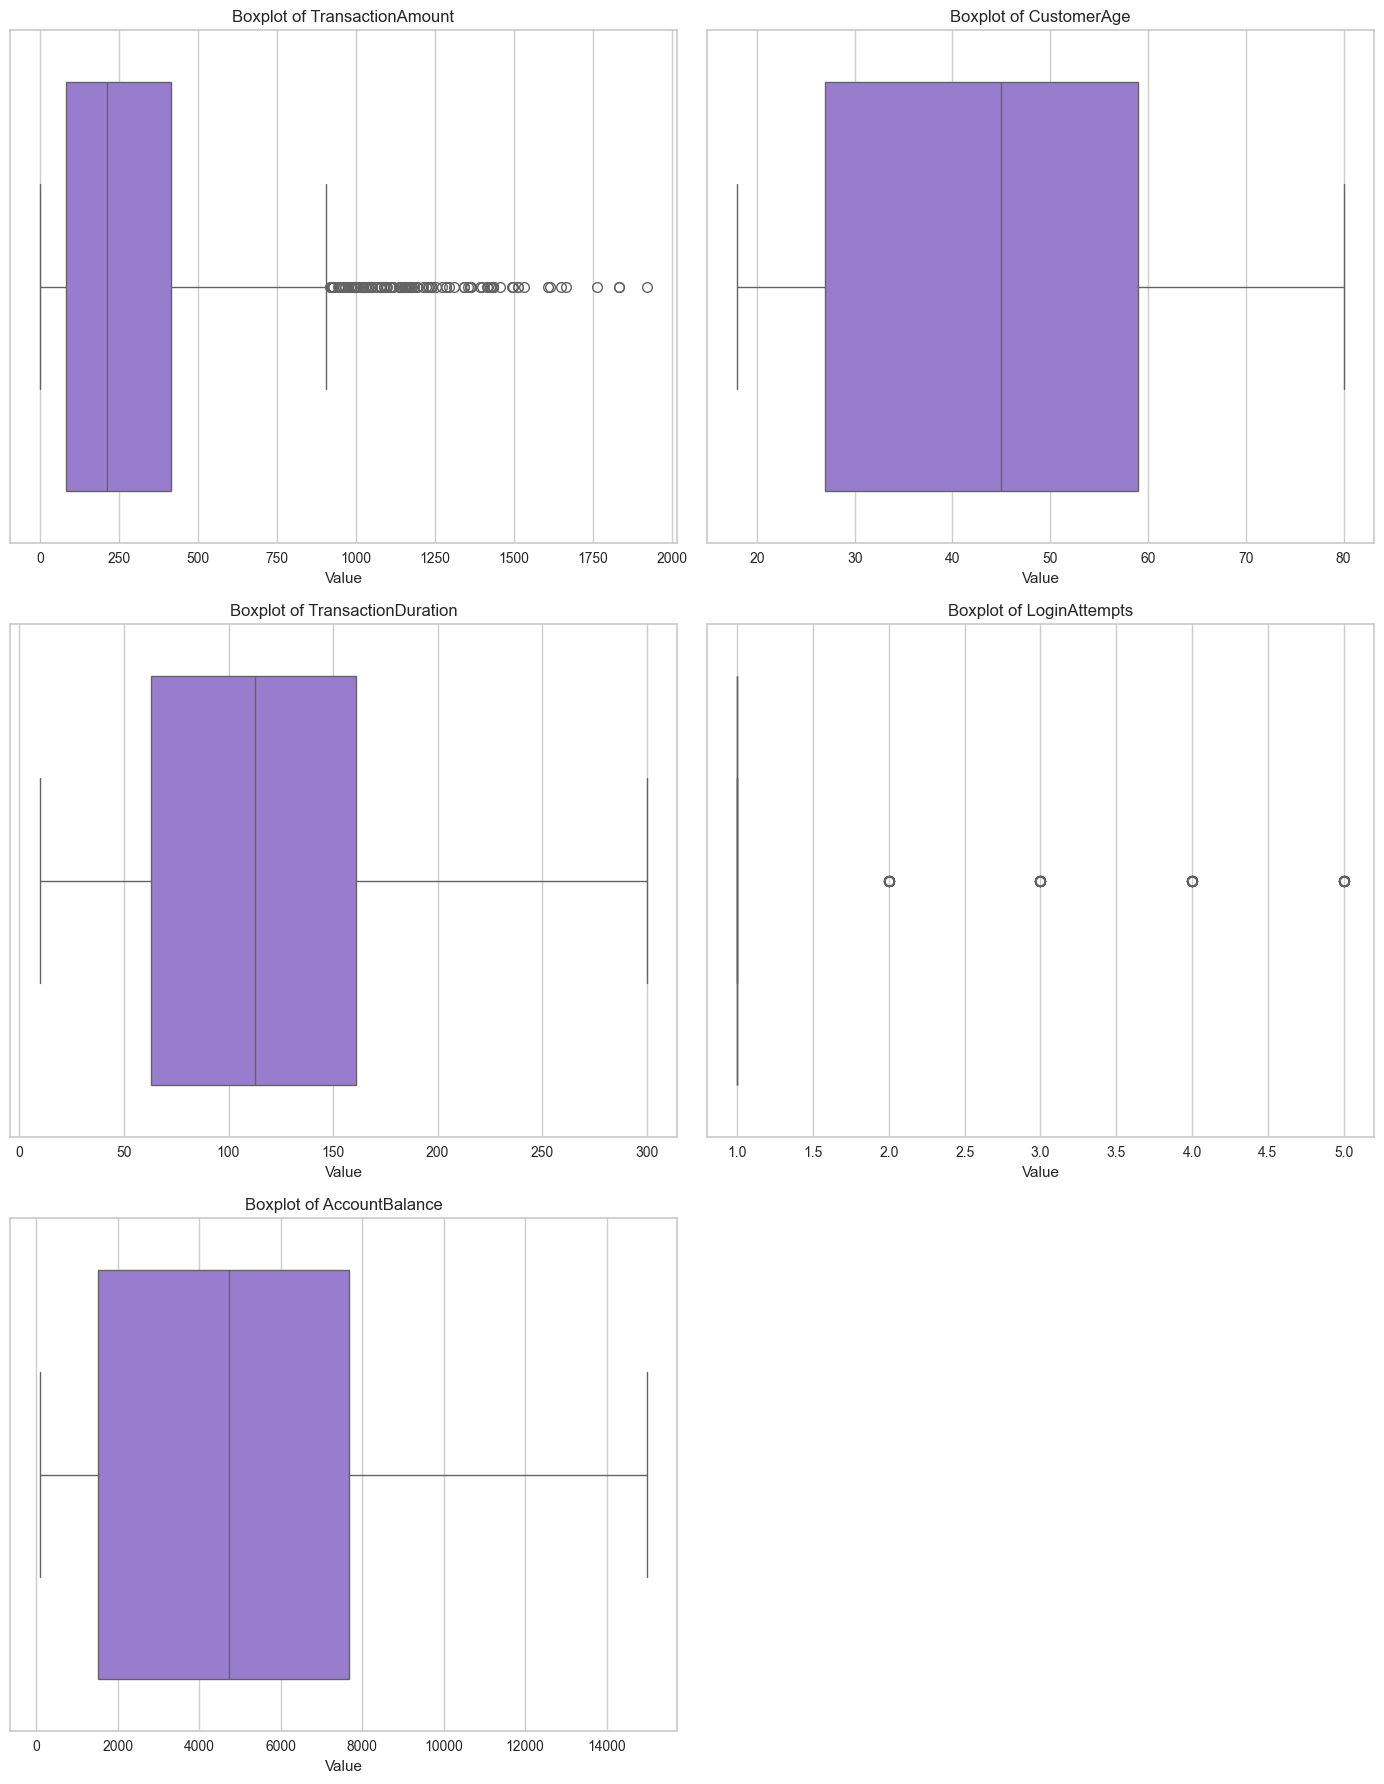

In [9]:
# Visualisasi untuk mendeteksi outlier menggunakan boxplot
# Menentukan jumlah kolom dan baris dalam layout subplot
plots_per_row = 2
rows_required = -(-num_numeric // plots_per_row)  # pembulatan ke atas

# Membuat canvas subplot
fig, box_axes = plt.subplots(rows_required, plots_per_row, figsize=(14, rows_required * 6))
box_axes = box_axes.ravel()  # Jadikan array 1 dimensi agar mudah dipanggil per index

# Membuat boxplot untuk setiap fitur numerik
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=bank_df[column], ax=box_axes[i], color='mediumpurple')
    box_axes[i].set_title(f"Boxplot of {column}")
    box_axes[i].set_xlabel("Value")

# Hapus plot kosong jika jumlah fitur tidak pas dengan grid
for j in range(i + 1, len(box_axes)):
    fig.delaxes(box_axes[j])

# Merapikan tata letak
plt.tight_layout()
plt.show()


Beberapa fitur seperti TransactionAmount dan LoginAttempts menunjukkan keberadaan outlier yang cukup jelas. Nilai ekstrem pada TransactionAmount wajar ditemukan, mengingat perbedaan kebutuhan dan kapasitas transaksi tiap nasabah. Sementara itu, jumlah percobaan login lebih dari sekali pada LoginAttempts juga masih bisa diterima, karena kesalahan input atau retry adalah hal umum dalam sistem autentikasi.

Meskipun secara konteks masih masuk akal, nilai-nilai ekstrim yang terlalu jauh (khususnya pada TransactionAmount) berpotensi memengaruhi hasil clustering dan akan dipertimbangkan untuk penyesuaian di tahap preprocessing.

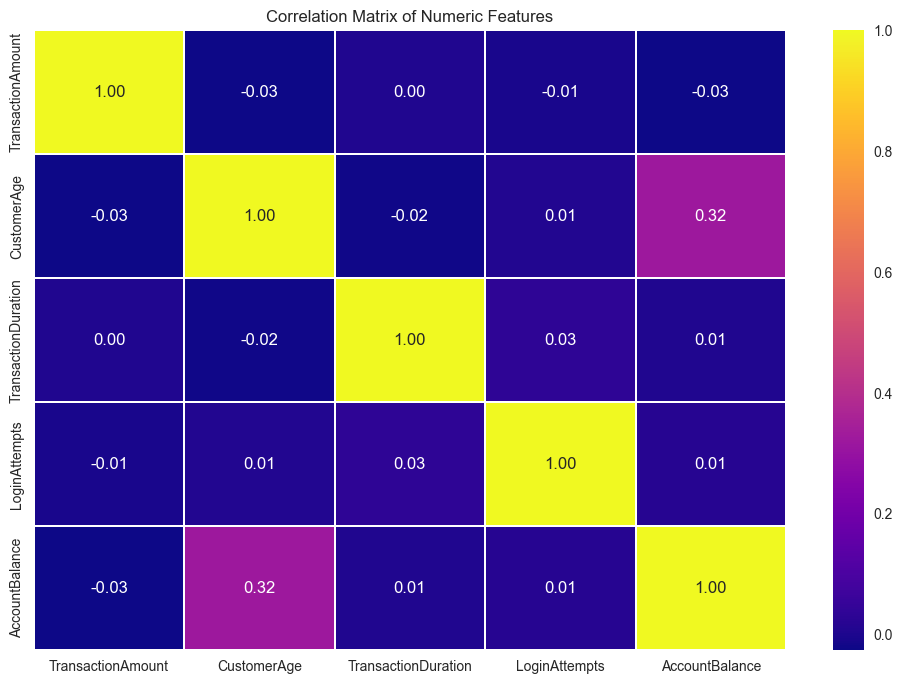

In [10]:
# Visualisasi korelasi antar fitur numerik menggunakan heatmap
# Menghitung korelasi antar fitur numerik
correlation_matrix = bank_df[numeric_columns].corr()

# Menampilkan heatmap dari matriks korelasi
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.3)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


Korelasi antar fitur numerik sebagian besar lemah. Hanya CustomerAge dan AccountBalance yang menunjukkan korelasi sedang (0.32), selebihnya saling independen dan cocok untuk clustering.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
# Identifikasi kolom kategorikal
categorical_columns = bank_df.select_dtypes(include='object').columns

# Menghapus fitur yang bersifat unik atau tidak informatif untuk visualisasi
excluded_columns = ['TransactionID', 'AccountID', 'TransactionDate', 'Location', 
                    'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']
categorical_columns = [col for col in categorical_columns if col not in excluded_columns]

# Hitung jumlah kolom kategorikal yang akan divisualisasikan
num_categorical = len(categorical_columns)

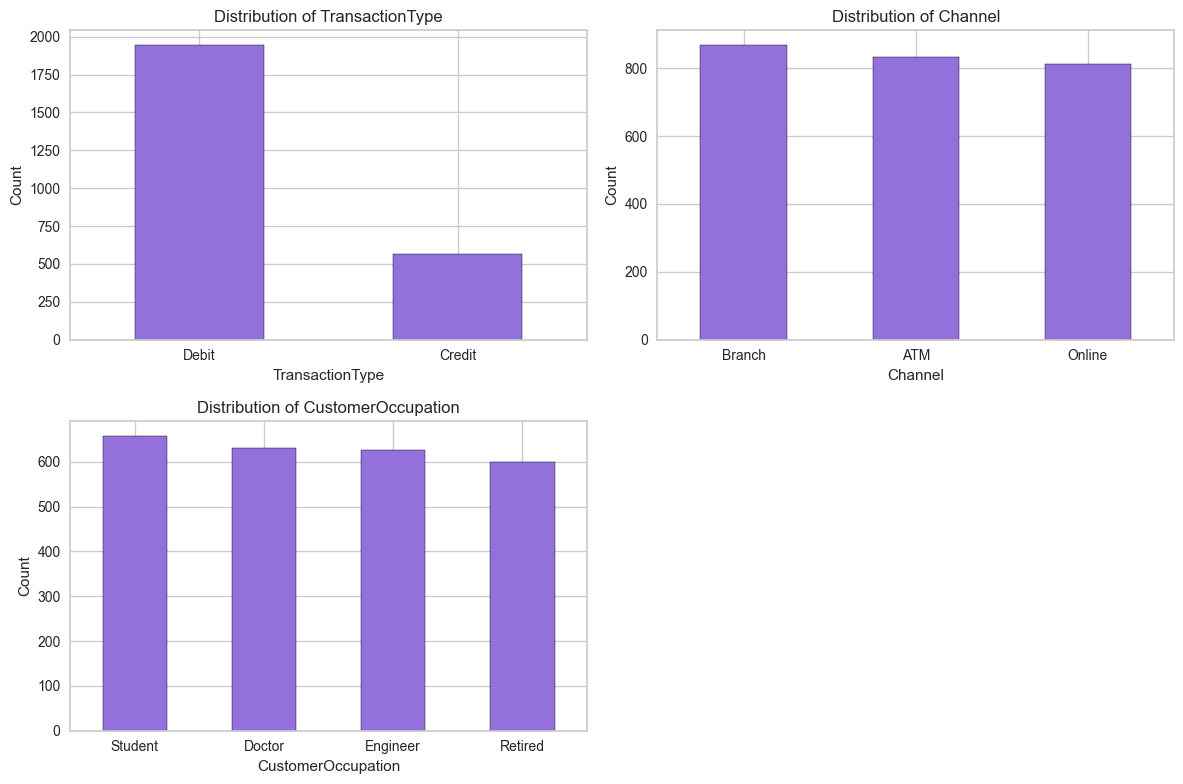

In [ ]:
# Visualisasi distribusi dari setiap fitur kategorikal dalam bentuk diagram batang
# Menentukan jumlah kolom dan baris untuk grid subplot
plots_per_row = 2
rows_required = -(-num_categorical // plots_per_row)

# Membuat canvas subplot
fig, cat_axes = plt.subplots(rows_required, plots_per_row, figsize=(12, rows_required * 4))
cat_axes = cat_axes.ravel()  # Ubah jadi 1 dimensi untuk iterasi lebih mudah  karena bisa diakses per index

# Plot bar chart untuk setiap fitur kategorikal
for i, column in enumerate(categorical_columns):
    bank_df[column].value_counts().plot(kind='bar', ax=cat_axes[i], color='mediumpurple', edgecolor='black')
    cat_axes[i].set_title(f"Distribution of {column}")
    cat_axes[i].set_xlabel(column)
    cat_axes[i].set_ylabel("Count")
    cat_axes[i].tick_params(axis='x', rotation=0)

# Hapus subplot kosong jika jumlah fitur tidak genap
for j in range(i + 1, len(cat_axes)):
    fig.delaxes(cat_axes[j])

# Merapikan tampilan layout
plt.tight_layout()
plt.show()


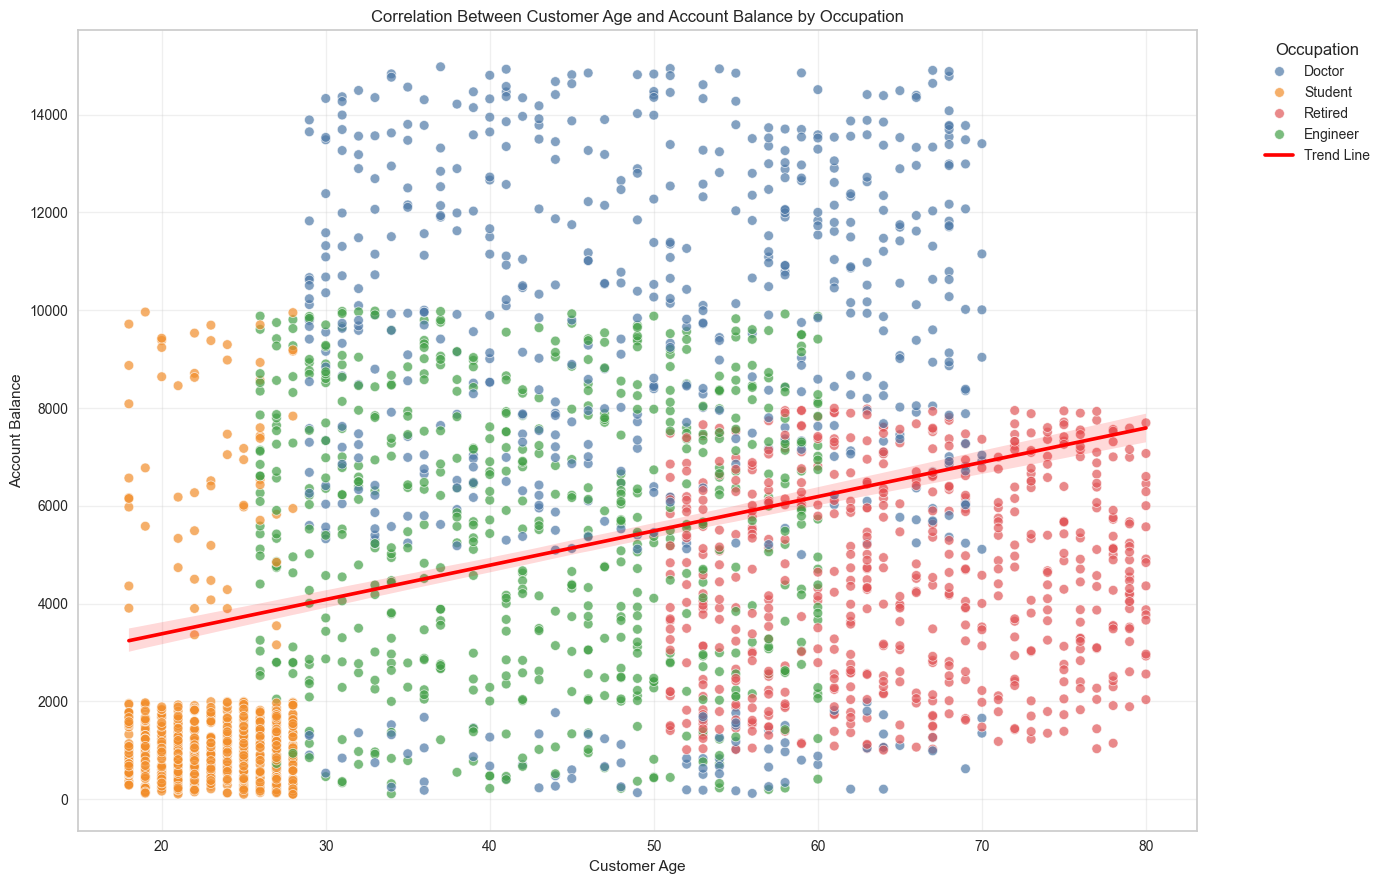

In [36]:
# Visualisasi hubungan antara usia nasabah dan saldo akun, dibedakan berdasarkan jenis pekerjaan menggunakan scatter plot
custom_palette = {
    'Doctor': '#4E79A7',
    'Student': '#F28E2B',
    'Retired': '#E15759', 
    'Engineer': '#43A047'     
}

plt.figure(figsize=(14, 9))
sns.scatterplot(
    data=bank_df,
    x='CustomerAge',
    y='AccountBalance',
    hue='CustomerOccupation',
    palette=custom_palette,
    alpha=0.7
)
sns.regplot(
    data=bank_df,
    x='CustomerAge',
    y='AccountBalance',
    scatter=False,
    color='red',
    label='Trend Line'
)

plt.title('Correlation Between Customer Age and Account Balance by Occupation')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Scatter plot menunjukkan adanya korelasi positif antara variabel *CustomerAge* (usia pelanggan) dan *AccountBalance* (saldo akun), di mana semakin tinggi usia pelanggan, cenderung semakin besar saldo yang dimiliki. Visualisasi juga memperlihatkan bahwa variabel *CustomerOccupation* (pekerjaan pelanggan) turut memengaruhi distribusi saldo. Pelanggan dengan pekerjaan Doctor umumnya berada pada rentang usia menengah hingga tua dengan saldo tinggi. Sementara itu, kelompok Student didominasi oleh usia muda dengan saldo rendah. Pekerjaan Engineer tersebar di usia produktif dengan saldo yang bervariasi, sedangkan kelompok Retired berada pada usia lanjut dengan saldo cenderung sedang hingga rendah. Perbedaan distribusi ini mengindikasikan bahwa *CustomerOccupation* berpotensi menjadi variabel penting dalam segmentasi pelanggan untuk analisis lebih lanjut.

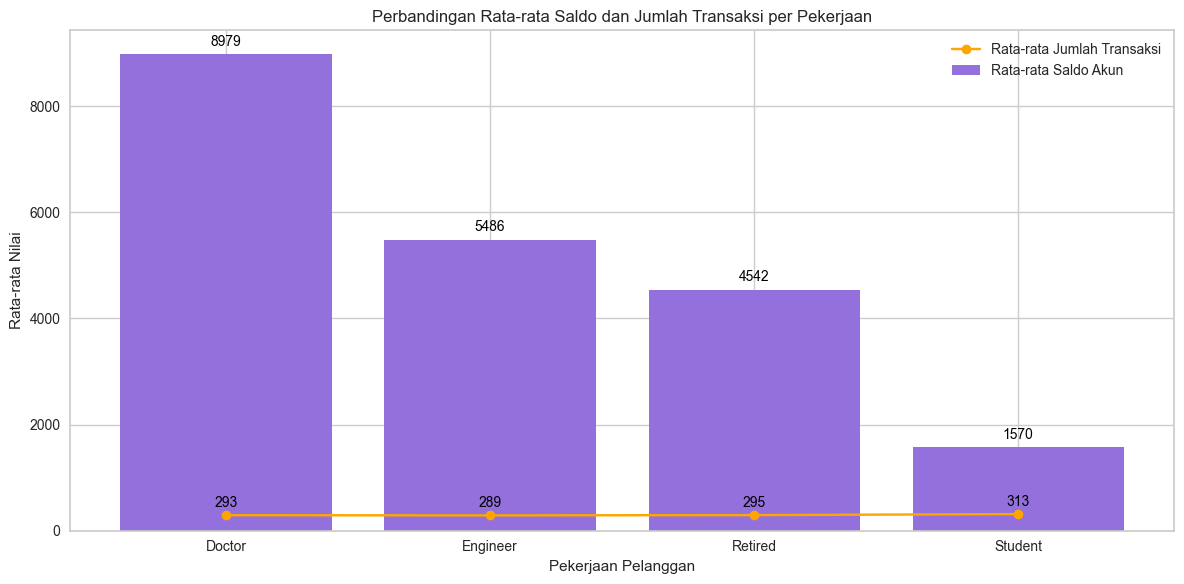

In [73]:
#Visualisasi Perbandingan Rata-rata Saldo dan Jumlah Transaksi per Pekerjaan
# Hitung rata-rata berdasarkan pekerjaan
occupation_group = bank_df.groupby('CustomerOccupation')
avg_balance = occupation_group['AccountBalance'].mean()
avg_transaction = occupation_group['TransactionAmount'].mean()
occupations = avg_balance.index

# Plot kombinasi bar chart dan line chart dengan label
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart
bars = ax.bar(occupations, avg_balance, color='mediumpurple', label='Rata-rata Saldo Akun')

# Tambahkan label pada bar chart
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 100, f'{height:.0f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Line chart
line = ax.plot(occupations, avg_transaction, color='orange', marker='o', label='Rata-rata Jumlah Transaksi')

# Tambahkan label pada titik line chart
for x, y in zip(occupations, avg_transaction):
    ax.text(x, y + 100, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Label dan judul
ax.set_xlabel('Pekerjaan Pelanggan')
ax.set_ylabel('Rata-rata Nilai')
plt.title('Perbandingan Rata-rata Saldo dan Jumlah Transaksi per Pekerjaan')
plt.legend()
plt.tight_layout()
plt.show()

Perbandingan antarprofesi menunjukkan bahwa jumlah transaksi cenderung mirip dan tidak terlalu dipengaruhi oleh jenis pekerjaan. Sebaliknya, perbedaan yang lebih jelas terlihat pada saldo akun. Tingginya saldo tidak selalu berbanding lurus dengan frekuensi transaksi, sehingga pelanggan dengan saldo besar belum tentu lebih sering bertransaksi.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Menangani data kosong
bank_df.isna().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [66]:
# Menangani data duplikasi
print("Jumlah data duplikasi ", bank_df.duplicated().sum())


Jumlah data duplikasi  0


In [67]:
bank_df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

Berdasarkan hasil statistik deskriptf, dataset ini tidak memiliki nilai kosong maupun duplikat, sehingga tidak memerlukan penanganan missing values atau duplikasi. Hal ini menunjukkan bahwa kualitas data cukup baik dan siap untuk diproses lebih lanjut tanpa perlu pembersihan mendasar.

In [68]:
# Menghapus kolom kategorikal yang tidak relevan
irrelevant_columns = [
    'TransactionID', 'AccountID', 'TransactionDate', 'Location',
    'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'
]

# Menyalin DataFrame untuk proses pembersihan/penghapusan
filtered_df = bank_df.copy()

# Menghapus kolom yang dianggap tidak relevan jika ada di dalam DataFrame
filtered_df.drop(columns=[col for col in irrelevant_columns if col in filtered_df.columns], inplace=True)

# Cek dimensi
# Jumlah baris dan kolom sebelum penghapusan kolom
baris_awal = bank_df.shape[0]
kolom_awal = bank_df.shape[1]
print(f"Sebelum penghapusan: {baris_awal} baris dan {kolom_awal} kolom.")

# Jumlah baris dan kolom setelah penghapusan kolom
baris_setelah = filtered_df.shape[0]
kolom_setelah = filtered_df.shape[1]
print(f"Setelah penghapusan: {baris_setelah} baris dan {kolom_setelah} kolom.")

print(filtered_df.head())


Sebelum penghapusan: 2512 baris dan 16 kolom.
Setelah penghapusan: 2512 baris dan 8 kolom.
   TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM           70             Doctor   
1             376.24           Debit     ATM           68             Doctor   
2             126.29           Debit  Online           19            Student   
3             184.50           Debit  Online           26            Student   
4              13.45          Credit  Online           26            Student   

   TransactionDuration  LoginAttempts  AccountBalance  
0                   81              1         5112.21  
1                  141              1        13758.91  
2                   56              1         1122.35  
3                   25              1         8569.06  
4                  198              1         7429.40  


In [ ]:
# Identifikasi kolom kategorikal pada DataFrame hasil pembersihan
categorical_columns = filtered_df.select_dtypes(include='object').columns
# Menampilkan hanya kolom-kolom kategorikal
filtered_df[categorical_columns]


TransactionType Channel CustomerOccupation
0              Debit     ATM             Doctor
1              Debit     ATM             Doctor
2              Debit  Online            Student
3              Debit  Online            Student
4             Credit  Online            Student
...              ...     ...                ...
2507          Credit  Branch             Doctor
2508           Debit  Branch             Doctor
2509           Debit  Branch            Retired
2510           Debit  Online            Student
2511          Credit  Online            Student

[2512 rows x 3 columns]

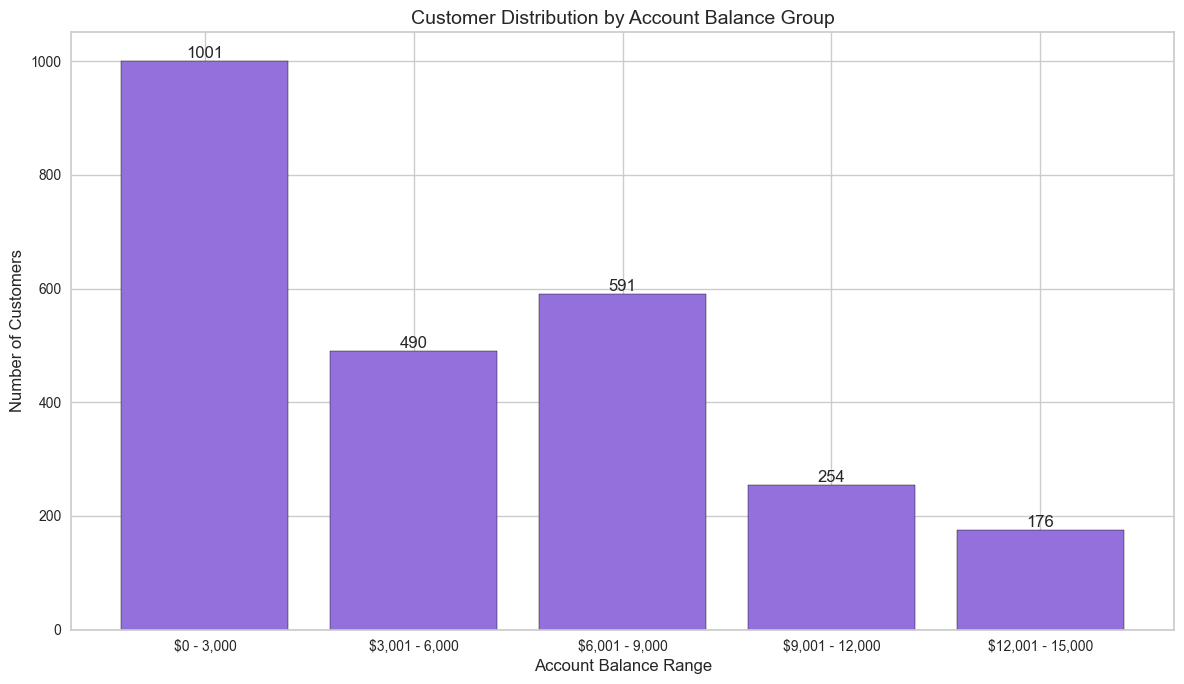

In [82]:
# Pengelompokan (Binning) AccountBalance
# Membuat bin dan label untuk pengelompokan saldo akun
balance_intervals = [0, 3000, 6000, 9000, 12000, 15000]
balance_labels = [
    '$0 - 3,000', '$3,001 - 6,000', '$6,001 - 9,000', '$9,001 - 12,000', '$12,001 - 15,000'
]

# Menambahkan kolom baru berdasarkan bin saldo
filtered_df['BalanceGroup'] = pd.cut(
    filtered_df['AccountBalance'],
    bins=balance_intervals,
    labels=balance_labels,
    right=False,
    include_lowest=True
)

# Menghitung jumlah pelanggan di setiap kategori saldo
balance_distribution = filtered_df['BalanceGroup'].value_counts().reindex(balance_labels).fillna(0).astype(int)

# Visualisasi distribusi saldo pelanggan
plt.figure(figsize=(12, 7))
plt.bar(balance_labels, balance_distribution.values, color='mediumpurple', edgecolor='black')
plt.title('Customer Distribution by Account Balance Group', fontsize=14)
plt.xlabel('Account Balance Range', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0, ha='center')

# Label jumlah di atas setiap bar
for i, val in enumerate(balance_distribution.values):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()


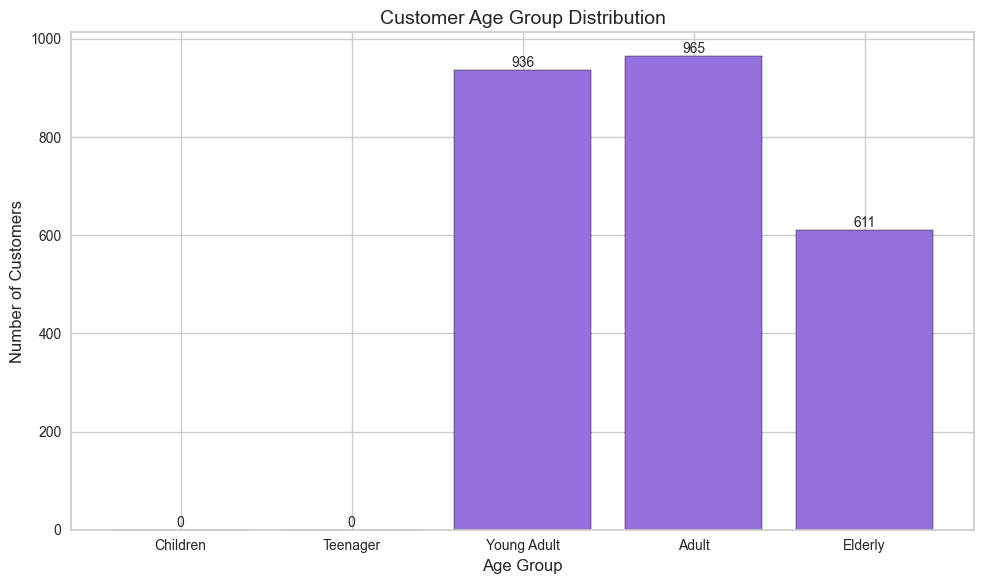

In [103]:
# Binning CustomerAge ke dalam kategori usia
# Definisikan interval dan label untuk kategori usia
age_intervals = [0, 12, 18, 35, 60, float('inf')]
age_labels = ['Children', 'Teenager', 'Young Adult', 'Adult', 'Elderly']

# Menambahkan kolom kategori usia ke dalam dataframe
filtered_df['AgeGroup'] = pd.cut(
    filtered_df['CustomerAge'],
    bins=age_intervals,
    labels=age_labels,
    right=False
)

# Menghitung jumlah pelanggan di tiap kelompok usia
age_group_counts = filtered_df['AgeGroup'].value_counts().reindex(age_labels).fillna(0).astype(int)

# Visualisasi distribusi kelompok usia pelanggan
plt.figure(figsize=(10, 6))
bars = plt.bar(age_labels, age_group_counts.values, color='mediumpurple', edgecolor='black')

plt.title("Customer Age Group Distribution", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Menambahkan label jumlah di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



Deteksi dan penanganan outlier

In [104]:
# Deteksi Outlier (Sebelum Penanganan)
# Menyalin dataframe untuk menjaga data asli
outlier_handled_df = filtered_df.copy()

# Identifikasi kolom numerik
numeric_columns = outlier_handled_df.select_dtypes(include='number').columns

# Menghitung Q1, Q3, dan IQR
Q1 = outlier_handled_df[numeric_columns].quantile(0.25)
Q3 = outlier_handled_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi outlier
outlier_counts = ((outlier_handled_df[numeric_columns] < lower_bound) | 
                  (outlier_handled_df[numeric_columns] > upper_bound)).sum()

print("Jumlah outlier sebelum penanganan:")
print(outlier_counts)



Jumlah outlier sebelum penanganan:
TransactionAmount      113
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
AccountBalance           0
dtype: int64


In [105]:
# Penanganan Outlier (Capping)
# Fungsi untuk melakukan capping berdasarkan IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped = np.where(series < lower, lower, series)
    capped = np.where(capped > upper, upper, capped)
    return capped

# Terapkan capping hanya pada kolom TransactionAmount
outlier_handled_df['TransactionAmount'] = cap_outliers(outlier_handled_df['TransactionAmount'])

# Capping hanya dilakukan pada kolom TransactionAmount karena nilai outlier-nya cukup ekstrem 
# dan berpotensi mengganggu model berbasis jarak seperti K-Means, 
# sementara LoginAttempts bersifat diskrit dan nilainya masih logis.

# Menampilkan 3 data awal kolom TransactionAmount setelah capping
print(outlier_handled_df[['TransactionAmount']].head(3))


   TransactionAmount
0              14.09
1             376.24
2             126.29


In [106]:
# Evaluasi Outlier Setelah Penanganan
# Menghitung ulang outlier setelah capping
post_outliers = ((outlier_handled_df[numeric_columns] < lower_bound) | 
                 (outlier_handled_df[numeric_columns] > upper_bound)).sum()

print("Jumlah outlier setelah penanganan:")
print(post_outliers)



Jumlah outlier setelah penanganan:
TransactionAmount        0
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
AccountBalance           0
dtype: int64


In [107]:
# Menampilkan kolom kategorikal dari dataframe hasil outlier handling
categorical_columns = outlier_handled_df.select_dtypes(include='object').columns
outlier_handled_df[categorical_columns]


TransactionType Channel CustomerOccupation
0              Debit     ATM             Doctor
1              Debit     ATM             Doctor
2              Debit  Online            Student
3              Debit  Online            Student
4             Credit  Online            Student
...              ...     ...                ...
2507          Credit  Branch             Doctor
2508           Debit  Branch             Doctor
2509           Debit  Branch            Retired
2510           Debit  Online            Student
2511          Credit  Online            Student

[2512 rows x 3 columns]

In [109]:
# Menampilkan kolom numerik dari dataframe hasil outlier handling
numerical_columns = outlier_handled_df.select_dtypes(include='number').columns
outlier_handled_df[numerical_columns]


TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0                 14.09           70                   81              1   
1                376.24           68                  141              1   
2                126.29           19                   56              1   
3                184.50           26                   25              1   
4                 13.45           26                  198              1   
...                 ...          ...                  ...            ...   
2507             856.21           33                  109              1   
2508             251.54           48                  177              1   
2509              28.63           56                  146              1   
2510             185.97           23                   19              1   
2511             243.08           24                   93              1   

      AccountBalance  
0            5112.21  
1           13758.91  
2            1122.35  
3            8569.06  
4            7429.40  
...              ...  
2507        12690.79  
2508          254.75  
2509         3382.91  
2510         1776.91  
2511          131.25  

[2512 rows x 5 columns]

Standarisasi

In [110]:
# Statistik sebelum standarisasi
# Identifikasi kolom numerik
numerical_columns = outlier_handled_df.select_dtypes(include='number').columns

# Menampilkan statistik ringkasan
print("Standar Deviasi tiap fitur:")
print(outlier_handled_df[numerical_columns].std())
print("\nMean tiap fitur:")
print(outlier_handled_df[numerical_columns].mean())
print("\nMinimum tiap fitur:")
print(outlier_handled_df[numerical_columns].min())
print("\nMaksimum tiap fitur:")
print(outlier_handled_df[numerical_columns].max())


Standar Deviasi tiap fitur:
TransactionAmount       252.067285
CustomerAge              17.792198
TransactionDuration      69.963757
LoginAttempts             0.602662
AccountBalance         3900.942499
dtype: float64

Mean tiap fitur:
TransactionAmount       284.847250
CustomerAge              44.673965
TransactionDuration     119.643312
LoginAttempts             1.124602
AccountBalance         5114.302966
dtype: float64

Minimum tiap fitur:
TransactionAmount        0.26
CustomerAge             18.00
TransactionDuration     10.00
LoginAttempts            1.00
AccountBalance         101.25
dtype: float64

Maksimum tiap fitur:
TransactionAmount        913.49125
CustomerAge               80.00000
TransactionDuration      300.00000
LoginAttempts              5.00000
AccountBalance         14977.99000
dtype: float64


Standar deviasi dan rentang nilai antar fitur numerik menunjukkan variasi yang sangat berbeda. Sebagai contoh, AccountBalance memiliki standar deviasi lebih dari 3900 dengan nilai maksimum mencapai hampir 15.000, sedangkan LoginAttempts hanya bervariasi antara 1 hingga 5. Ketimpangan skala ini berpotensi menyebabkan fitur dengan nilai besar seperti AccountBalance mendominasi perhitungan jarak dalam algoritma clustering seperti K-Means. Oleh karena itu, perlu dilakukan standarisasi agar setiap fitur memiliki skala yang setara dan kontribusi yang seimbang dalam proses analisis.

In [111]:
# Standarisasi Fitur Numerik dengan Z-Score
# Inisialisasi scaler
scaler = StandardScaler()

# Transformasi fitur-fitur numerik
scaled_data = scaler.fit_transform(outlier_handled_df[numerical_columns])

# Konversi kembali ke DataFrame dengan nama kolom asli
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns, index=outlier_handled_df.index)
scaled_df.head(3)


TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -1.074361     1.423718            -0.552443      -0.206794   
1           0.362645     1.311287             0.305314      -0.206794   
2          -0.629153    -1.443277            -0.909842      -0.206794   

   AccountBalance  
0       -0.000537  
1        2.216472  
2       -1.023534

In [112]:
# Statistik setelah standarisasi
print("Statistik setelah standarisasi (Z-score):\n")
print("Standar Deviasi tiap fitur:")
print(scaled_df.std())
print("\nMean tiap fitur:")
print(scaled_df.mean())
print("\nMinimum tiap fitur:")
print(scaled_df.min())
print("\nMaksimum tiap fitur:")
print(scaled_df.max())


Statistik setelah standarisasi (Z-score):

Standar Deviasi tiap fitur:
TransactionAmount      1.000199
CustomerAge            1.000199
TransactionDuration    1.000199
LoginAttempts          1.000199
AccountBalance         1.000199
dtype: float64

Mean tiap fitur:
TransactionAmount      8.344351e-17
CustomerAge            9.900078e-18
TransactionDuration    7.637203e-17
LoginAttempts          1.527441e-16
AccountBalance         4.985396e-17
dtype: float64

Minimum tiap fitur:
TransactionAmount     -1.129238
CustomerAge           -1.499493
TransactionDuration   -1.567456
LoginAttempts         -0.206794
AccountBalance        -1.285344
dtype: float64

Maksimum tiap fitur:
TransactionAmount      2.494450
CustomerAge            1.985874
TransactionDuration    2.578372
LoginAttempts          6.431745
AccountBalance         2.529043
dtype: float64


Setelah dilakukan standarisasi, semua fitur numerik sekarang punya rata-rata mendekati nol dan standar deviasi mendekati satu. Artinya, skala dari setiap fitur sudah dibuat sama. Ini penting karena algoritma seperti K-Means sangat bergantung pada perhitungan jarak. Dengan skala yang setara, tidak ada satu fitur pun yang terlalu mendominasi, sehingga semua fitur punya kontribusi yang seimbang dalam proses clustering

Encoding fitur kategorikal

In [113]:
# Encoding Data Kategorikal dengan One-Hot Encoding untuk mengubah variabel kategorikal menjadi representasi numerik biner
# Identifikasi kolom kategorikal dari dataframe hasil outlier handling
categorical_columns = outlier_handled_df.select_dtypes(include='object').columns

# Inisialisasi encoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Transformasi data kategorikal
encoded_data = onehot_encoder.fit_transform(outlier_handled_df[categorical_columns])

# Mengambil nama fitur hasil encoding
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_columns)

# Konversi ke DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=outlier_handled_df.index)

# Menggabungkan hasil encoding dengan fitur numerik yang sudah distandarisasi
preprocessed_df = pd.concat([scaled_df, encoded_df], axis=1)

# Menampilkan DataFrame
preprocessed_df


TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0             -1.074361     1.423718            -0.552443      -0.206794   
1              0.362645     1.311287             0.305314      -0.206794   
2             -0.629153    -1.443277            -0.909842      -0.206794   
3             -0.398176    -1.049768            -1.353017      -0.206794   
4             -1.076900    -1.049768             1.120184      -0.206794   
...                 ...          ...                  ...            ...   
2507           2.267159    -0.656259            -0.152156      -0.206794   
2508          -0.132163     0.186975             0.819969      -0.206794   
2509          -1.016666     0.636700             0.376794      -0.206794   
2510          -0.392343    -1.218415            -1.438793      -0.206794   
2511          -0.165732    -1.162199            -0.380892      -0.206794   

      AccountBalance  TransactionType_Credit  TransactionType_Debit  \
0          -0.000537                     0.0                    1.0   
1           2.216472                     0.0                    1.0   
2          -1.023534                     0.0                    1.0   
3           0.885797                     0.0                    1.0   
4           0.593589                     1.0                    0.0   
...              ...                     ...                    ...   
2507        1.942606                     1.0                    0.0   
2508       -1.245986                     0.0                    1.0   
2509       -0.443928                     0.0                    1.0   
2510       -0.855705                     0.0                    1.0   
2511       -1.277652                     1.0                    0.0   

      Channel_ATM  Channel_Branch  Channel_Online  CustomerOccupation_Doctor  \
0             1.0             0.0             0.0                        1.0   
1             1.0             0.0             0.0                        1.0   
2             0.0             0.0             1.0                        0.0   
3             0.0             0.0             1.0                        0.0   
4             0.0             0.0             1.0                        0.0   
...           ...             ...             ...                        ...   
2507          0.0             1.0             0.0                        1.0   
2508          0.0             1.0             0.0                        1.0   
2509          0.0             1.0             0.0                        0.0   
2510          0.0             0.0             1.0                        0.0   
2511          0.0             0.0             1.0                        0.0   

      CustomerOccupation_Engineer  CustomerOccupation_Retired  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
2507                          0.0                         0.0   
2508                          0.0                         0.0   
2509                          0.0                         1.0   
2510                          0.0                         0.0   
2511                          0.0                         0.0   

      CustomerOccupation_Student  
0                            0.0  
1                            0.0  
2                            1.0  
3                            1.0  
4                            1.0  
...                          ...  
2507                         0.0  
2508                         0.0  
2509                         0.0  
2510                         1.0  
2511                         1.0  

[2512 rows x 14 columns]

Data kategorikal seperti TransactionType, Channel, dan CustomerOccupation sudah berhasil diubah menjadi angka biner dengan One-Hot Encoding. Setiap kategori dibuat menjadi kolom baru dengan nilai 0 atau 1. Proses ini dilakukan supaya algoritma seperti K-Means bisa memahami data kategorikal dengan benar, tanpa menganggap ada urutan atau nilai lebih besar/kecil. Sekarang, seluruh fitur di preprocessed_df sudah berbentuk numerik dan siap untuk tahap clustering.

In [120]:
# Binning TransactionAmount setelah standarisasi ke dalam kategori besaran transaksi
# Definisikan batas interval dan label untuk nilai transaksi
transaction_intervals = [-float('inf'), -1, 1, 3, float('inf')]
transaction_labels = ['Very Low', 'Low', 'High', 'Very High']

# Menambahkan kolom baru hasil binning
binned_amount = pd.cut(
    preprocessed_df['TransactionAmount'],
    bins=transaction_intervals,
    labels=transaction_labels,
    right=False
)

# Buat DataFrame baru untuk melihat hasil binning
sample_binned_df = pd.DataFrame({
    'TransactionAmount': preprocessed_df['TransactionAmount'],
    'TransactionAmountBinned': binned_amount
})

# Menampilkan beberapa sampel hasil binning
print(sample_binned_df.sample(7))



      TransactionAmount TransactionAmountBinned
2070           0.642745                     Low
1710          -0.821163                     Low
943            0.369311                     Low
78            -0.652961                     Low
740            0.383993                     Low
564            0.320822                     Low
18            -1.056148                Very Low


In [115]:
preprocessed_df.head()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -1.074361     1.423718            -0.552443      -0.206794   
1           0.362645     1.311287             0.305314      -0.206794   
2          -0.629153    -1.443277            -0.909842      -0.206794   
3          -0.398176    -1.049768            -1.353017      -0.206794   
4          -1.076900    -1.049768             1.120184      -0.206794   

   AccountBalance  TransactionType_Credit  TransactionType_Debit  Channel_ATM  \
0       -0.000537                     0.0                    1.0          1.0   
1        2.216472                     0.0                    1.0          1.0   
2       -1.023534                     0.0                    1.0          0.0   
3        0.885797                     0.0                    1.0          0.0   
4        0.593589                     1.0                    0.0          0.0   

   Channel_Branch  Channel_Online  CustomerOccupation_Doctor  \
0             0.0             0.0                        1.0   
1             0.0             0.0                        1.0   
2             0.0             1.0                        0.0   
3             0.0             1.0                        0.0   
4             0.0             1.0                        0.0   

   CustomerOccupation_Engineer  CustomerOccupation_Retired  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   

   CustomerOccupation_Student  
0                         0.0  
1                         0.0  
2                         1.0  
3                         1.0  
4                         1.0

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [119]:
# Inisialisasi model K-Means dengan jumlah cluster = 5
k = 5
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)

# Melatih model pada data yang sudah melalui preprocessing
kmeans_model.fit(preprocessed_df)

# Menyimpan hasil label cluster
cluster_labels = kmeans_model.labels_

# Menambahkan kolom hasil cluster ke dataframe (preprocessed_df)
preprocessed_df['Cluster'] = cluster_labels

# Menampilkan distribusi jumlah data per cluster
cluster_distribution = preprocessed_df['Cluster'].value_counts().sort_index()
print("Distribusi Data per Cluster:")
print(cluster_distribution)


Distribusi Data per Cluster:
Cluster
0    704
1     95
2    362
3    662
4    689
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

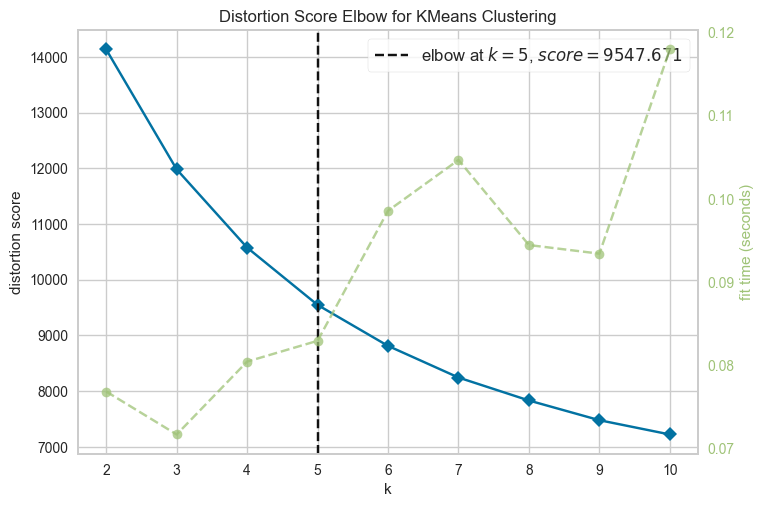

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [150]:
# Evaluasi dengan Elbow Method untuk Menentukan Jumlah Cluster Optimal
# Menyiapkan data evaluasi (tanpa kolom cluster) agar fokus hanya pada fitur
eval_data = preprocessed_df.drop(columns=['Cluster'])

# Inisialisasi objek KMeans tanpa jumlah cluster tetap
base_kmeans = KMeans(random_state=42, n_init=10)

# Menggunakan KElbowVisualizer untuk menentukan jumlah cluster optimal (range 2–10)
elbow_viz = KElbowVisualizer(base_kmeans, k=(2, 11), metric='distortion')
elbow_viz.fit(eval_data)
elbow_viz.show()


In [ ]:
# Evaluasi dengan Silhouette Score
# Menggunakan label hasil clustering sebelumnya
cluster_labels = preprocessed_df['Cluster']

# Menghitung silhouette score menggunakan data numerik (tanpa kolom cluster)
sil_score = silhouette_score(eval_data, cluster_labels)

print(f"Silhouette Score dari model saat ini: {sil_score:.4f}")

Silhouette Score dari model saat ini: 0.1928


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [135]:
# Feature Selection: Variance Threshold
selector = VarianceThreshold(threshold=0.15)
reduced_by_variance = selector.fit_transform(eval_data)

# Mencari nilai k terbaik berdasarkan Silhouette Score
print("Evaluasi Silhouette Score setelah Variance Threshold:\n")
best_k = None
best_score = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(reduced_by_variance)
    score = silhouette_score(reduced_by_variance, labels)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

    if score > best_score:
        best_k = k
        best_score = score

print(f"\nNilai k optimal: {best_k}")
print(f"Silhouette Score dengan Variance Threshold: {best_score:.4f}")


Evaluasi Silhouette Score setelah Variance Threshold:

k = 2, Silhouette Score = 0.1817
k = 3, Silhouette Score = 0.1982
k = 4, Silhouette Score = 0.1936
k = 5, Silhouette Score = 0.1928
k = 6, Silhouette Score = 0.1869
k = 7, Silhouette Score = 0.1847
k = 8, Silhouette Score = 0.1841
k = 9, Silhouette Score = 0.1748
k = 10, Silhouette Score = 0.1746

Nilai k optimal: 3
Silhouette Score dengan Variance Threshold: 0.1982


In [138]:
# Feature Selection: Random Forest
# Menggunakan hasil fitur dari Variance Threshold untuk melatih model KMeans awal
kmeans_temp = KMeans(n_clusters=best_k, random_state=42, n_init=10)
temp_labels = kmeans_temp.fit_predict(reduced_by_variance)

# Membuat model Random Forest untuk mengukur kepentingan fitur
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(reduced_by_variance, temp_labels)

# Mengambil top-n fitur paling berpengaruh
importance_scores = rf_model.feature_importances_
top_n = 4
top_idx = np.argsort(importance_scores)[::-1][:top_n]

# Filter fitur dengan indeks terbaik
rf_selected_features = reduced_by_variance[:, top_idx]

# Clustering ulang menggunakan fitur hasil seleksi RF
kmeans_rf = KMeans(n_clusters=best_k, random_state=42, n_init=10)
rf_labels = kmeans_rf.fit_predict(rf_selected_features)

# Evaluasi performa cluster
sil_rf = silhouette_score(rf_selected_features, rf_labels)
print(f"Silhouette Score setelah seleksi fitur dengan Random Forest: {sil_rf:.4f}")


Silhouette Score setelah seleksi fitur dengan Random Forest: 0.4616


In [151]:
# Feature Engineering: Polynomial + PCA
# Membuat fitur interaksi antar variabel dari hasil seleksi Random Forest
poly_engineer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_generated = poly_engineer.fit_transform(rf_selected_features)

# Reduksi dimensi dengan PCA untuk merangkum informasi
pca_model = PCA(n_components=2)
features_poly2d = pca_model.fit_transform(poly_generated)

# Clustering pada hasil reduksi dimensi
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_poly_pca = kmeans_final.fit_predict(features_poly2d)

# Evaluasi performa clustering
poly2d_sil_score = silhouette_score(features_poly2d, labels_poly_pca)
print(f"Silhouette Score Akhir (Polynomial + PCA): {poly2d_sil_score:.4f}")

# Distribusi data pada masing-masing cluster
cluster_dist = pd.Series(labels_poly_pca).value_counts().sort_index()
print("\nDistribusi Data per Cluster:")
print(cluster_dist)


Silhouette Score Akhir (Polynomial + PCA): 0.7403

Distribusi Data per Cluster:
0    1859
1     626
2      27
Name: count, dtype: int64


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [152]:
print(bank_df.columns)

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


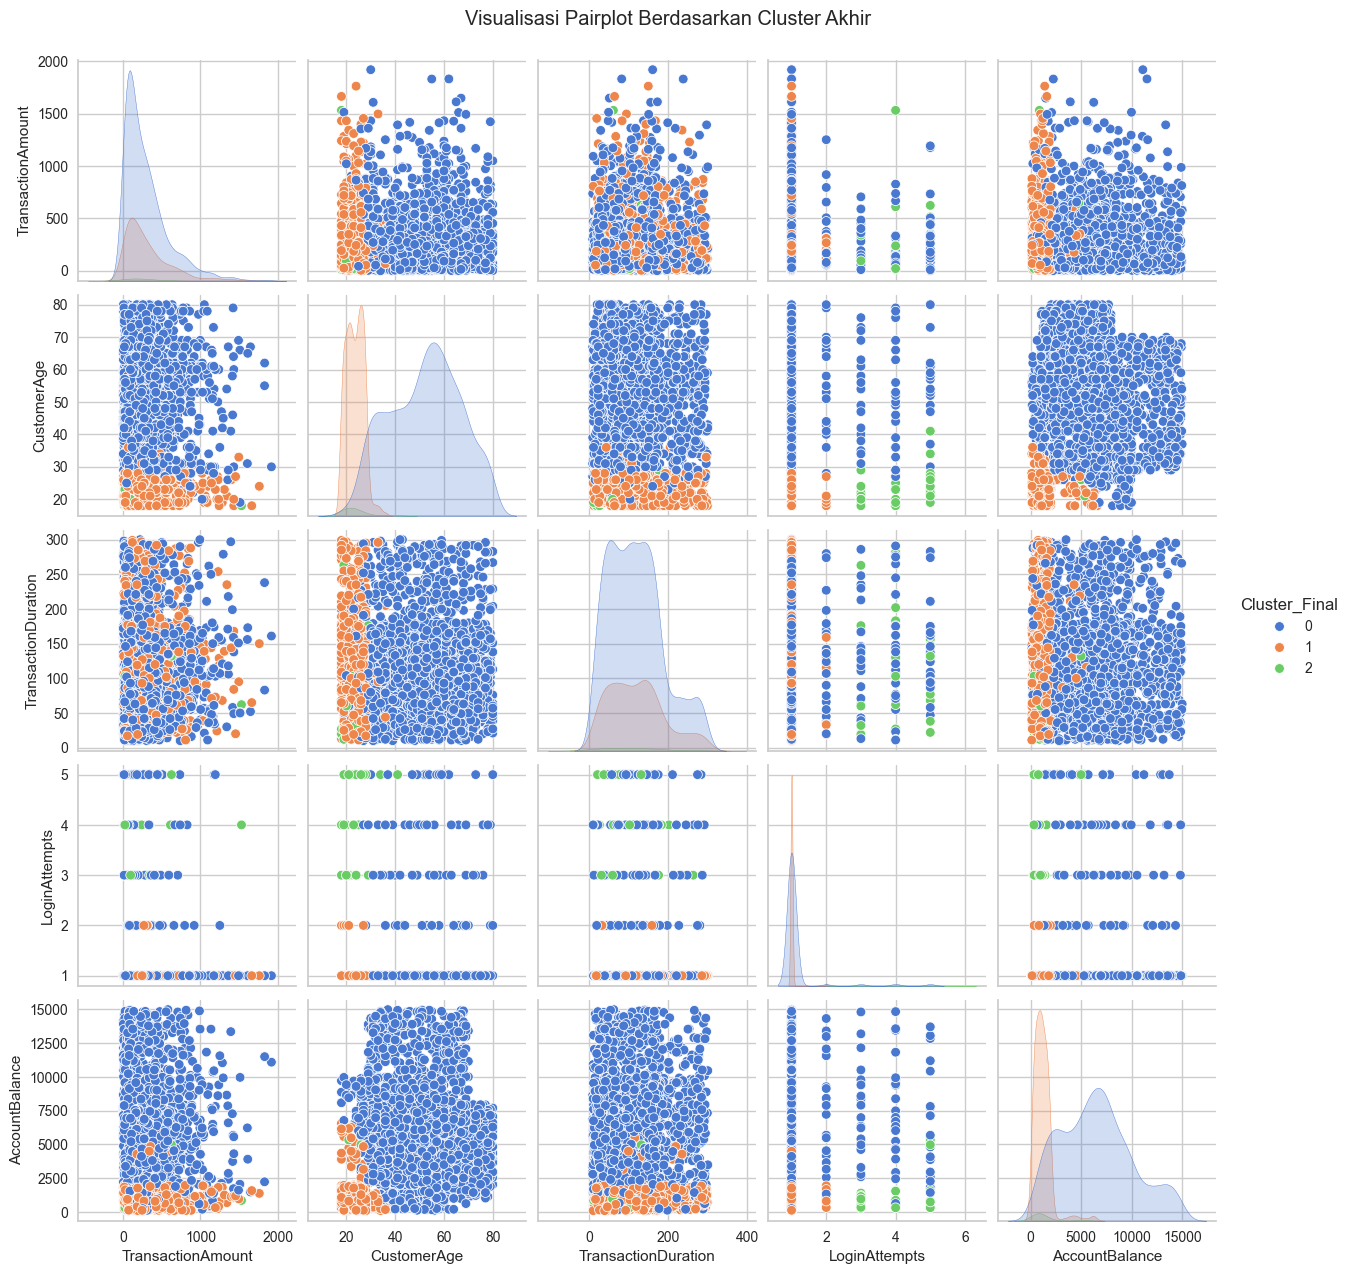

In [ ]:
# Menyalin dataframe asli dan menambahkan label cluster hasil akhir
df_visual = bank_df.copy()
df_visual['Cluster_Final'] = labels_poly_pca

# Mengambil semua kolom numerik (Cluster_Final termasuk karena label cluster berupa angka)
numeric_cols = df_visual.select_dtypes(include='number').columns

# Membuat pairplot antar fitur numerik dengan pewarnaan berdasarkan cluster
sns.pairplot(df_visual[numeric_cols], hue='Cluster_Final', palette='muted')
plt.suptitle("Visualisasi Pairplot Berdasarkan Cluster Akhir", y=1.02)
plt.show()


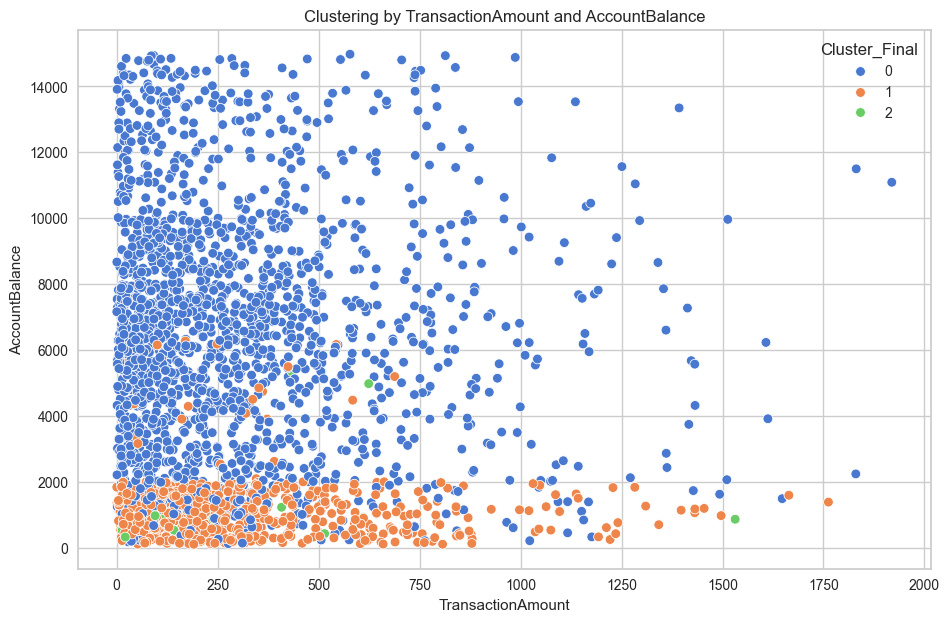

In [182]:
# Scatter Plot: TransactionAmount vs AccountBalance
plt.figure(figsize=(11, 7))
sns.scatterplot(
    data=df_visual,
    x='TransactionAmount',
    y='AccountBalance',
    hue='Cluster_Final',
    palette='muted'
)
plt.title("Clustering by TransactionAmount and AccountBalance")
plt.xlabel("TransactionAmount")
plt.ylabel("AccountBalance")
plt.grid(True)
plt.show()


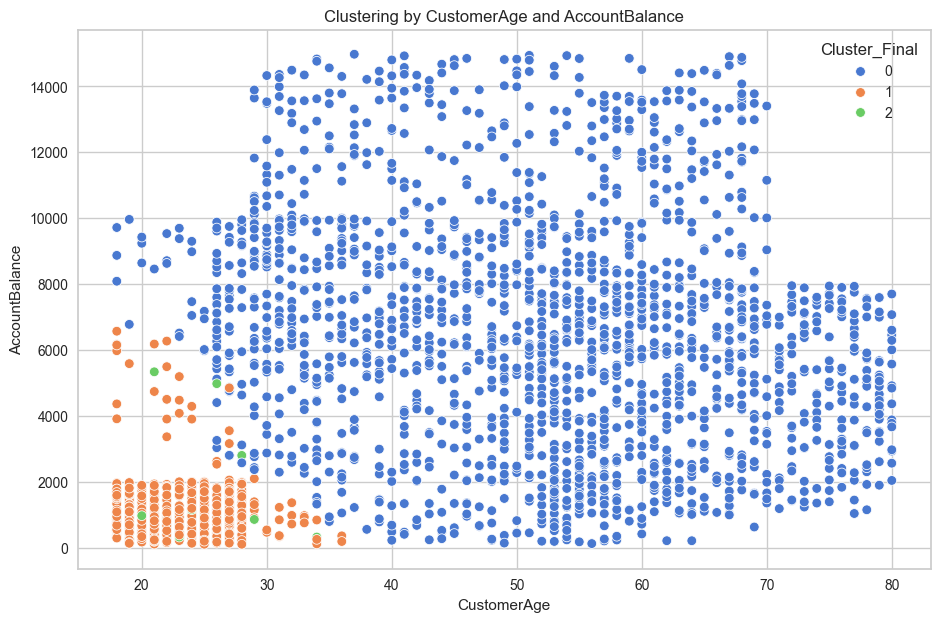

In [184]:
# Scatter Plot: CustomerAge vs AccountBalance
plt.figure(figsize=(11, 7))
sns.scatterplot(
    data=df_visual,
    x='CustomerAge',
    y='AccountBalance',
    hue='Cluster_Final',
    palette='muted'
)
plt.title("Clustering by CustomerAge and AccountBalance")
plt.xlabel("CustomerAge")
plt.ylabel("AccountBalance")
plt.grid(True)
plt.show()


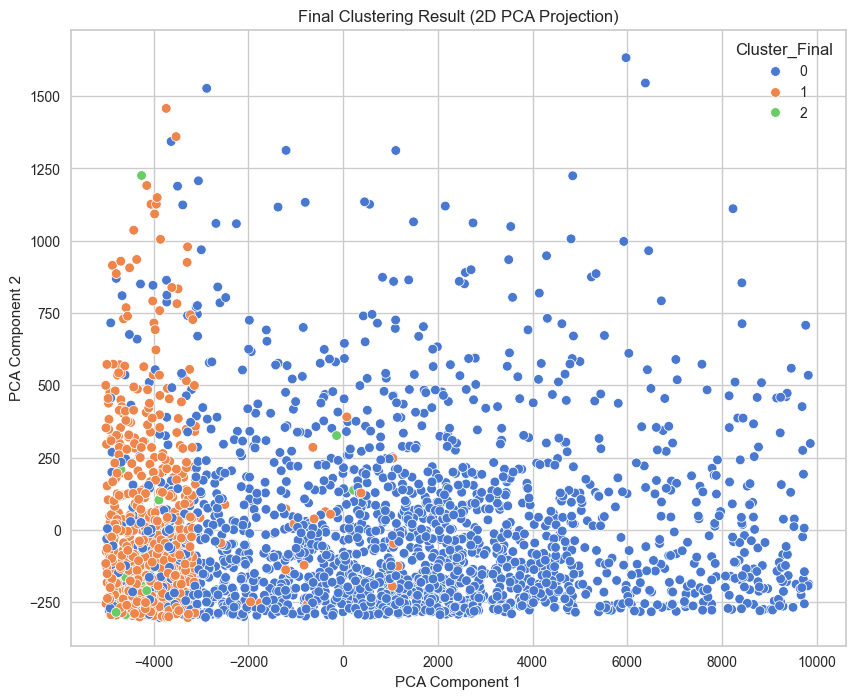

In [188]:
# Visualisasi Final Clustering K-Means
# Mengambil hanya kolom numerik (tanpa Cluster_Final)
numeric_cols = df_visual.drop(columns=['Cluster_Final']).select_dtypes(include='number').columns

# PCA pada fitur numerik
pca_model = PCA(n_components=2)
pca_output = pca_model.fit_transform(df_visual[numeric_cols])

# Membuat DataFrame hasil proyeksi PCA
df_pca2d = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2'], index=df_visual.index)
df_pca2d['Cluster_Final'] = df_visual['Cluster_Final']

# Plot hasil PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca2d,
    x='PCA1',
    y='PCA2',
    hue='Cluster_Final',
    palette='muted'
)
plt.title("Final Clustering Result (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [191]:
df_visual


TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.218.92       M015   
1              Debit           Houston  D000051     13.149.61.4       M052   
2              Debit              Mesa  D000235  215.97.143.157       M009   
3              Debit           Raleigh  D000187  200.13.225.150       M002   
4             Credit           Atlanta  D000308    65.164.3.100       M091   
...              ...               ...      ...             ...        ...   
2507          Credit  Colorado Springs  D000625    21.157.41.17       M072   
2508           Debit            Tucson  D000410  49.174.157.140       M029   
2509           Debit         San Diego  D000095     58.1.27.124       M087   
2510           Debit            Denver  D000634   21.190.11.223       M041   
2511          Credit      Jacksonville  D000215   59.127.135.25       M041   

     Channel  CustomerAge CustomerOccupation  TransactionDuration  \
0        ATM           70             Doctor                   81   
1        ATM           68             Doctor                  141   
2     Online           19            Student                   56   
3     Online           26            Student                   25   
4     Online           26            Student                  198   
...      ...          ...                ...                  ...   
2507  Branch           33             Doctor                  109   
2508  Branch           48             Doctor                  177   
2509  Branch           56            Retired                  146   
2510  Online           23            Student                   19   
2511  Online           24            Student                   93   

      LoginAttempts  AccountBalance PreviousTransactionDate  Cluster_Final  
0                 1         5112.21     2024-11-04 08:08:08              0  
1                 1        13758.91     2024-11-04 08:09:35              0  
2                 1         1122.35     2024-11-04 08:07:04              1  
3                 1         8569.06     2024-11-04 08:09:06              0  
4                 1         7429.40     2024-11-04 08:06:39              0  
...             ...             ...                     ...            ...  
2507              1        12690.79     2024-11-04 08:11:29              0  
2508              1          254.75     2024-11-04 08:11:42              0  
2509              1         3382.91     2024-11-04 08:08:39              0  
2510              1         1776.91     2024-11-04 08:12:22              1  
2511              1          131.25     2024-11-04 08:07:49              1  

[2512 rows x 17 columns]

In [192]:
preprocessed_df

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0             -1.074361     1.423718            -0.552443      -0.206794   
1              0.362645     1.311287             0.305314      -0.206794   
2             -0.629153    -1.443277            -0.909842      -0.206794   
3             -0.398176    -1.049768            -1.353017      -0.206794   
4             -1.076900    -1.049768             1.120184      -0.206794   
...                 ...          ...                  ...            ...   
2507           2.267159    -0.656259            -0.152156      -0.206794   
2508          -0.132163     0.186975             0.819969      -0.206794   
2509          -1.016666     0.636700             0.376794      -0.206794   
2510          -0.392343    -1.218415            -1.438793      -0.206794   
2511          -0.165732    -1.162199            -0.380892      -0.206794   

      AccountBalance  TransactionType_Credit  TransactionType_Debit  \
0          -0.000537                     0.0                    1.0   
1           2.216472                     0.0                    1.0   
2          -1.023534                     0.0                    1.0   
3           0.885797                     0.0                    1.0   
4           0.593589                     1.0                    0.0   
...              ...                     ...                    ...   
2507        1.942606                     1.0                    0.0   
2508       -1.245986                     0.0                    1.0   
2509       -0.443928                     0.0                    1.0   
2510       -0.855705                     0.0                    1.0   
2511       -1.277652                     1.0                    0.0   

      Channel_ATM  Channel_Branch  Channel_Online  CustomerOccupation_Doctor  \
0             1.0             0.0             0.0                        1.0   
1             1.0             0.0             0.0                        1.0   
2             0.0             0.0             1.0                        0.0   
3             0.0             0.0             1.0                        0.0   
4             0.0             0.0             1.0                        0.0   
...           ...             ...             ...                        ...   
2507          0.0             1.0             0.0                        1.0   
2508          0.0             1.0             0.0                        1.0   
2509          0.0             1.0             0.0                        0.0   
2510          0.0             0.0             1.0                        0.0   
2511          0.0             0.0             1.0                        0.0   

      CustomerOccupation_Engineer  CustomerOccupation_Retired  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
2507                          0.0                         0.0   
2508                          0.0                         0.0   
2509                          0.0                         1.0   
2510                          0.0                         0.0   
2511                          0.0                         0.0   

      CustomerOccupation_Student  Cluster  
0                            0.0        3  
1                            0.0        0  
2                            1.0        4  
3                            1.0        0  
4                            1.0        4  
...                          ...      ...  
2507                         0.0        2  
2508                         0.0        4  
2509                         0.0        3  
2510                         1.0        4  
2511          

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Menyalin label cluster akhir dari df_visual ke data yang telah distandarisasi
preprocessed_df['Cluster_Final'] = df_visual['Cluster_Final'].values

# Melihat ringkasan rata-rata fitur untuk masing-masing cluster
preprocessed_df.groupby('Cluster_Final').mean()


TransactionAmount  CustomerAge  TransactionDuration  \
Cluster_Final                                                        
0                      -0.012949     0.419216            -0.004583   
1                       0.043827    -1.193360             0.020537   
2                      -0.124597    -1.195512            -0.160628   

               LoginAttempts  AccountBalance  TransactionType_Credit  \
Cluster_Final                                                          
0                  -0.006816        0.357296                0.232921   
1                  -0.188235       -1.017966                0.210863   
2                   4.833578       -0.998784                0.111111   

               TransactionType_Debit  Channel_ATM  Channel_Branch  \
Cluster_Final                                                       
0                           0.767079     0.330285        0.346423   
1                           0.789137     0.337061        0.343450   
2                           0.888889     0.296296        0.333333   

               Channel_Online  CustomerOccupation_Doctor  \
Cluster_Final                                              
0                    0.323292                   0.333513   
1                    0.319489                   0.015974   
2                    0.370370                   0.037037   

               CustomerOccupation_Engineer  CustomerOccupation_Retired  \
Cluster_Final                                                            
0                                 0.322754                    0.322216   
1                                 0.033546                    0.000000   
2                                 0.148148                    0.000000   

               CustomerOccupation_Student   Cluster  
Cluster_Final                                        
0                                0.021517  1.707370  
1                                0.950479  3.769968  
2                                0.814815  1.000000

In [ ]:
# --- Inverse transform fitur numerik ---
# Ffitur numerik yang sebelumnya distandarisasi
num_cols_scaled = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                   'LoginAttempts', 'AccountBalance']

# Mengembalikan ke skala asli
inverse_df = pd.DataFrame(
    scaler.inverse_transform(preprocessed_df[num_cols_scaled]),
    columns=num_cols_scaled,
    index=preprocessed_df.index
)

# --- Decode hasil One-Hot Encoding ---
# TransactionType: ambil nama kolom paling dominan per baris
inverse_df['TransactionType'] = preprocessed_df[['TransactionType_Credit', 'TransactionType_Debit']] \
    .idxmax(axis=1).str.replace('TransactionType_', '')

# Channel: ATM, Branch, Online
inverse_df['Channel'] = preprocessed_df[['Channel_ATM', 'Channel_Branch', 'Channel_Online']] \
    .idxmax(axis=1).str.replace('Channel_', '')

# CustomerOccupation
inverse_df['CustomerOccupation'] = preprocessed_df[[ 
    'CustomerOccupation_Doctor',
    'CustomerOccupation_Engineer',
    'CustomerOccupation_Retired',
    'CustomerOccupation_Student'
]].idxmax(axis=1).str.replace('CustomerOccupation_', '')

# Menambahkan label cluster akhir
inverse_df['Cluster_Final'] = preprocessed_df['Cluster_Final'].values

inverse_df.head()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         26.0                198.0            1.0   

   AccountBalance TransactionType Channel CustomerOccupation  Cluster_Final  
0         5112.21           Debit     ATM             Doctor              0  
1        13758.91           Debit     ATM             Doctor              0  
2         1122.35           Debit  Online            Student              1  
3         8569.06           Debit  Online            Student              0  
4         7429.40          Credit  Online            Student              0

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [201]:
# Ambil hanya kolom numerik dari hasil inverse
inv_num_only = inverse_df.select_dtypes(include='number')
# Menghitung rata-rata tiap fitur numerik berdasarkan cluster
cluster_means = inv_num_only.groupby('Cluster_Final').mean()
# Menampilkan hasil ringkasan
display(cluster_means)

TransactionAmount  CustomerAge  TransactionDuration  \
Cluster_Final                                                        
0                     281.583993    52.131253           119.322754   
1                     295.892310    23.445687           121.079872   
2                     253.446713    23.407407           108.407407   

               LoginAttempts  AccountBalance  
Cluster_Final                                 
0                   1.120495     6507.818392  
1                   1.011182     1144.065415  
2                   4.037037     1218.878148

In [203]:
# --- Analisis dan Interpretasi Hasil Clustering ---
# Memisahkan kolom numerik dan kategorikal
numeric_only = inverse_df.select_dtypes(include='number').drop(columns='Cluster_Final')
categorical_only = inverse_df.select_dtypes(exclude='number')

# Ringkasan statistik numerik per cluster (mean, min, max)
stat_numeric = inverse_df.groupby('Cluster_Final')[numeric_only.columns].agg(['min', 'max', 'mean'])

# Ringkasan data kategorikal: ambil nilai yang paling sering muncul (modus)
stat_categorical = inverse_df.groupby('Cluster_Final')[categorical_only.columns].agg(lambda x: x.mode().iloc[0])

# Menyederhanakan nama kolom hasil multi-level index
stat_numeric.columns = ['_'.join(col) for col in stat_numeric.columns]

# Menggabungkan hasil analisis numerik dan kategorikal
cluster_stats = pd.concat([stat_numeric, stat_categorical], axis=1)

# Tampilkan ringkasan analisis per cluster
print(cluster_stats)


               TransactionAmount_min  TransactionAmount_max  \
Cluster_Final                                                 
0                               0.32              913.49125   
1                               0.26              913.49125   
2                              13.48              913.49125   

               TransactionAmount_mean  CustomerAge_min  CustomerAge_max  \
Cluster_Final                                                             
0                          281.583993             18.0             80.0   
1                          295.892310             18.0             36.0   
2                          253.446713             18.0             41.0   

               CustomerAge_mean  TransactionDuration_min  \
Cluster_Final                                              
0                     52.131253                     10.0   
1                     23.445687                     11.0   
2                     23.407407                     12.0   

       

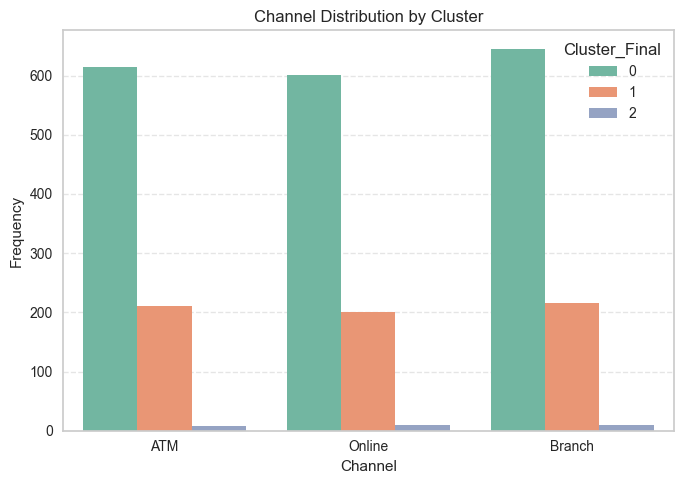

In [222]:
# Visualisasi distribusi Channel per Cluster
plt.figure(figsize=(7, 5))
sns.countplot(data=inverse_df, x='Channel', hue='Cluster_Final', palette='Set2')
plt.title('Channel Distribution by Cluster')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

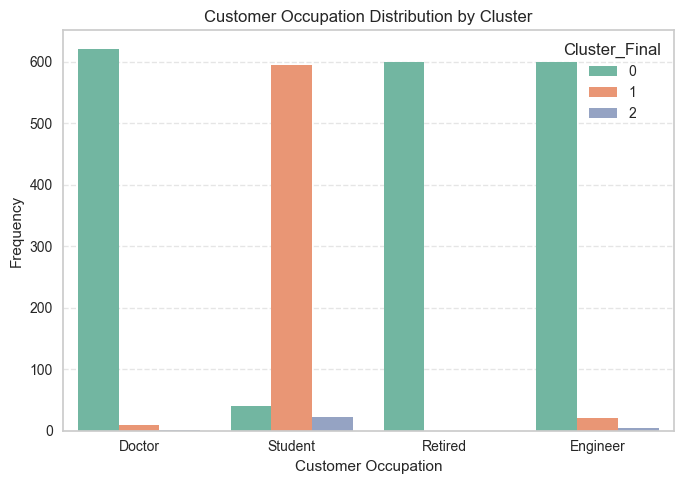

In [225]:
# Visualisasi distribusi Customer Occupation per Cluster
plt.figure(figsize=(7, 5))
sns.countplot(data=inverse_df, x='CustomerOccupation', hue='Cluster_Final', palette='Set2')
plt.title('Customer Occupation Distribution by Cluster')
plt.xlabel('Customer Occupation')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

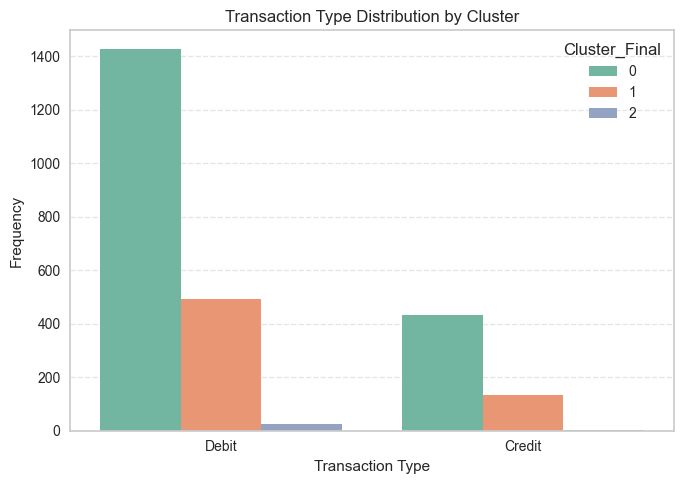

In [ ]:
# Visualisasi distribusi Transaction Type per Cluster
plt.figure(figsize=(7, 5))
sns.countplot(data=inverse_df, x='TransactionType', hue='Cluster_Final', palette='Set2')
plt.title('Transaction Type Distribution by Cluster')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

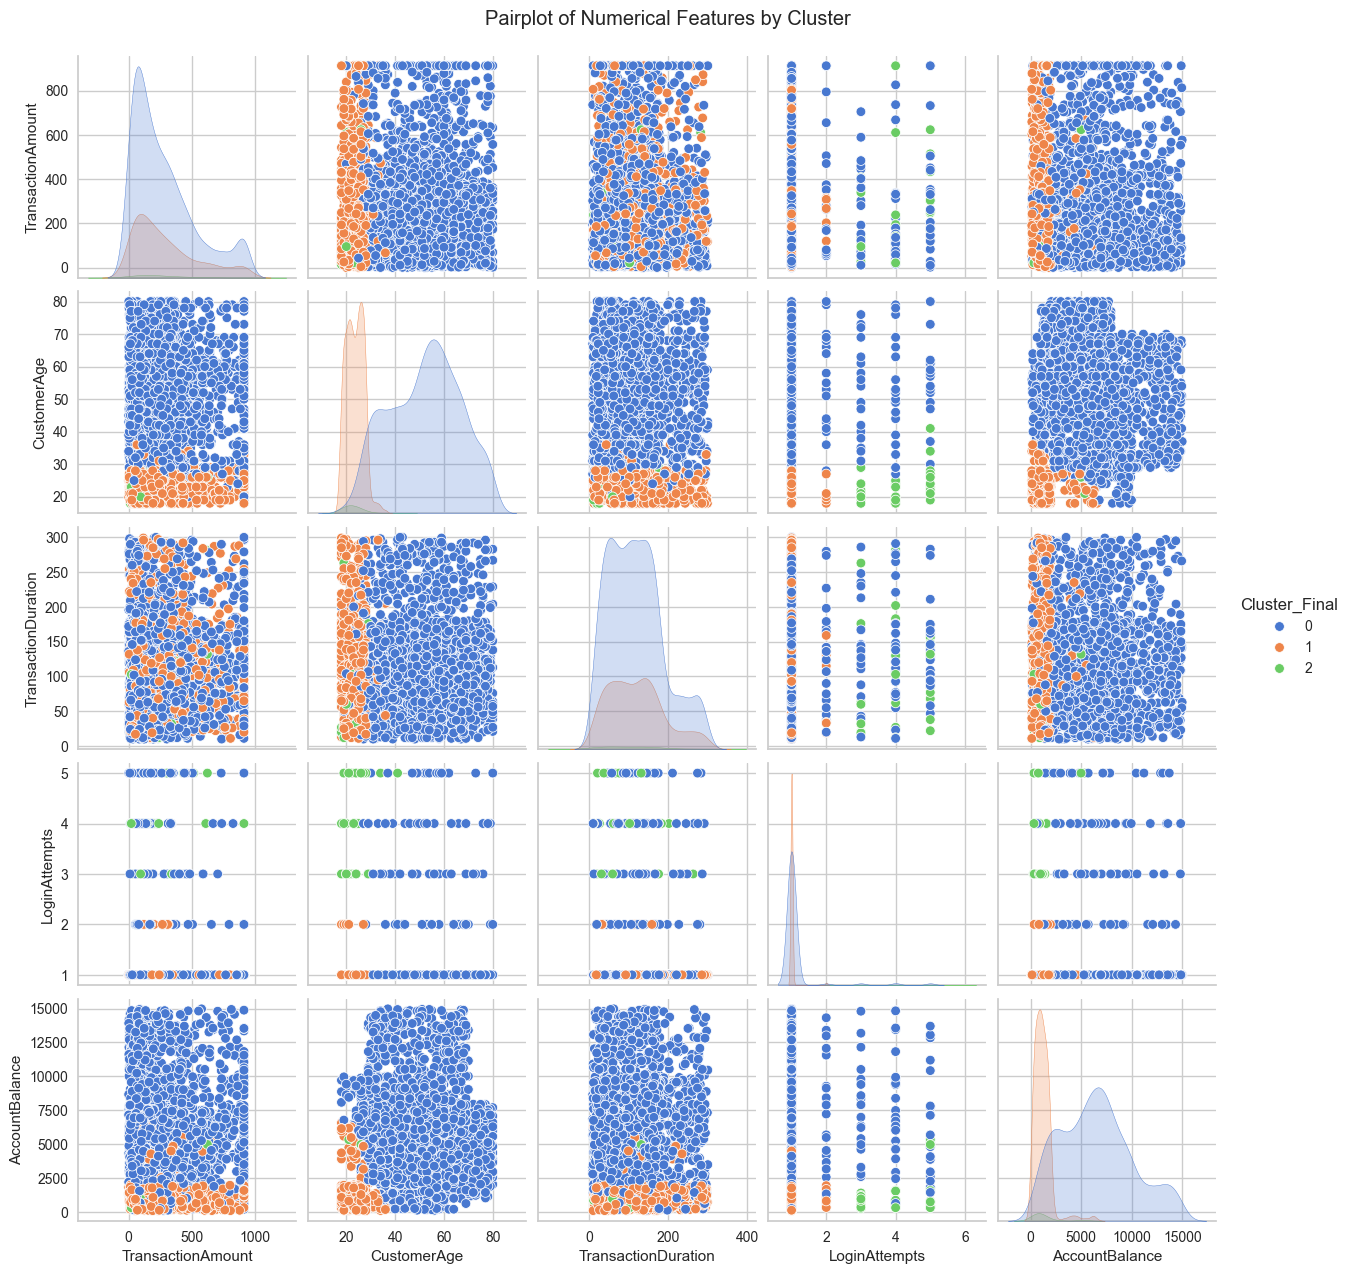

In [221]:
# Pairplot untuk fitur numerik, dikelompokkan berdasarkan cluster
sns.pairplot(inverse_df.select_dtypes(include='number'), hue='Cluster_Final', palette='muted')
plt.suptitle("Pairplot of Numerical Features by Cluster", y=1.02)
plt.show()

In [232]:
# --- Format dan tampilkan ringkasan statistik setiap cluster secara deskriptif ---

def tampilkan_ringkasan_cluster(cluster_stats):
    print(f"RINGKASAN PER CLUSTER")
    for cluster_label, row in cluster_stats.iterrows():
        print(f"\nRingkasan Cluster {cluster_label}:")
        for col, val in row.items():
            if '_' in col:
                base, stat = col.rsplit('_', 1)
                if stat == 'min':
                    print(f"  - {base} (min): {val:.2f}")
                elif stat == 'max':
                    print(f"  - {base} (max): {val:.2f}")
                elif stat == 'mean':
                    print(f"  - {base} (mean): {val:.2f}")
            else:
                print(f"  - {col}: kategori terbanyak = {val}")

# Panggil fungsi untuk menampilkan
tampilkan_ringkasan_cluster(cluster_stats)


RINGKASAN PER CLUSTER

Ringkasan Cluster 0:
  - TransactionAmount (min): 0.32
  - TransactionAmount (max): 913.49
  - TransactionAmount (mean): 281.58
  - CustomerAge (min): 18.00
  - CustomerAge (max): 80.00
  - CustomerAge (mean): 52.13
  - TransactionDuration (min): 10.00
  - TransactionDuration (max): 300.00
  - TransactionDuration (mean): 119.32
  - LoginAttempts (min): 1.00
  - LoginAttempts (max): 5.00
  - LoginAttempts (mean): 1.12
  - AccountBalance (min): 120.89
  - AccountBalance (max): 14977.99
  - AccountBalance (mean): 6507.82
  - TransactionType: kategori terbanyak = Debit
  - Channel: kategori terbanyak = Branch
  - CustomerOccupation: kategori terbanyak = Doctor

Ringkasan Cluster 1:
  - TransactionAmount (min): 0.26
  - TransactionAmount (max): 913.49
  - TransactionAmount (mean): 295.89
  - CustomerAge (min): 18.00
  - CustomerAge (max): 36.00
  - CustomerAge (mean): 23.45
  - TransactionDuration (min): 11.00
  - TransactionDuration (max): 299.00
  - TransactionDurat

Tulis hasil interpretasinya di sini.
1. Cluster 0: Stable Professionals
2. Cluster 1: Youth Banking Segment
3. Cluster 2: Potential Risk Users

(analisis dan interpretasi lebih lanjut ada di bawah)

# Analisis Karakteristik Cluster dari Model KMeans
## Cluster 0 – "Stable Professionals"
- Karakteristik utama:
    - Usia: Paling tinggi, rata-rata di atas 50 tahun.
    - Saldo akun: Paling besar, sekitar 6.500+.
    - Jenis transaksi: Mayoritas transaksi adalah Debit, dengan volume  transaksi juga tinggi.
    - Channel: Penggunaan channel sangat merata (ATM, Online, Branch).
    - Pekerjaan: Didominasi oleh Doctor, Engineer, dan Retired.

- Insight dan rekomendasi:
    - Segmen ini menunjukkan pelanggan yang stabil secara finansial dan aktif bertransaksi.
    - Potensi tinggi untuk ditargetkan dengan produk wealth management, tabungan berjangka, atau asuransi pensiun.
    - Bisa menjadi basis pelanggan loyal jangka panjang.

## Cluster 1 – "Youth Banking Segment"
- Karakteristik utama:
   - Usia: Muda, rata-rata sekitar 23 tahun.
   - Saldo akun: Rendah hingga menengah (sekitar 1.100).
   - Login Attempts: Normal (sekali login).
   - Jenis transaksi: Debit mendominasi.
   - Channel: Lebih banyak digunakan di ATM dan Branch.
   - Pekerjaan: Didominasi oleh Student.

- Insight dan rekomendasi:
   - Merupakan kelompok pelanggan muda dan aktif menggunakan layanan dasar bank.
   - Potensi besar untuk diarahkan ke produk digital seperti mobile banking, e-wallet, atau promo lifestyle anak muda.
   - Bisa dibina untuk menjadi nasabah jangka panjang dengan edukasi finansial sejak dini.

## Cluster 2 – "Potential Risk Users"
- Karakteristik utama:
   - Ukuran cluster: Sangat kecil dibanding lainnya.
   - Usia dan saldo: Mirip dengan Cluster 1, namun saldo cenderung rendah (sekitar 1.200).
   - Login Attempts: Sangat tinggi (rata-rata >4x).
   - Channel: Hampir seluruh transaksi dilakukan secara Online.
   - Pekerjaan: Mayoritas Student dan sebagian Engineer.

- Insight dan rekomendasi:
   - Perilaku tidak wajar dengan frekuensi login yang tinggi dan dominasi kanal online.
   - Berpotensi sebagai akun dengan risiko tinggi: bisa karena user tidak memahami keamanan atau adanya aktivitas mencurigakan (misalnya akun mule).
   - Perlu dilakukan monitoring khusus, aktivasi 2FA, dan penyuluhan terkait keamanan digital.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [233]:
inverse_df.to_csv('dataset_clustering.csv', index=False)
print("✅ Data berhasil disimpan ke dalam 'dataset_clustering.csv'")


✅ Data berhasil disimpan ke dalam 'dataset_clustering.csv'
